In [1]:
import Bio
from Bio import Phylo
from Bio import SeqIO
import re

In [2]:
with open('../results/APP_tree') as f:
    APP_tree = next(val for val in Phylo.parse(f,'newick'))
    print(APP_tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=331.672607421875)
            Clade(branch_length=705.8046875)
                Clade(branch_length=267.2750000000001)
                    Clade(branch_length=1468.465909090909)
                        Clade(branch_length=657.0625, name='Q03157.2')
                        Clade(branch_length=655.9375, name='P51693.3')
                    Clade(branch_length=253.284090909091)
                        Clade(branch_length=2536.833333333333, name='P14599.2')
                        Clade(branch_length=239.66666666666697)
                            Clade(branch_length=2053.846153846154, name='Q06BR2.2')
                            Clade(branch_length=2267.153846153846, name='Q10651.2')
                Clade(branch_length=958.8499999999999)
                    Clade(branch_length=747.3928571428571, name='Q06335.4')
                    Clade(branch_length=83.60714285714289)
                        Clade(branch_length=368.56

In [3]:
with open('../results/AP4_tree') as f:
    AP4_tree = next(Phylo.parse(f,'newick'))

In [4]:
print(type(AP4_tree))

<class 'Bio.Phylo.Newick.Tree'>


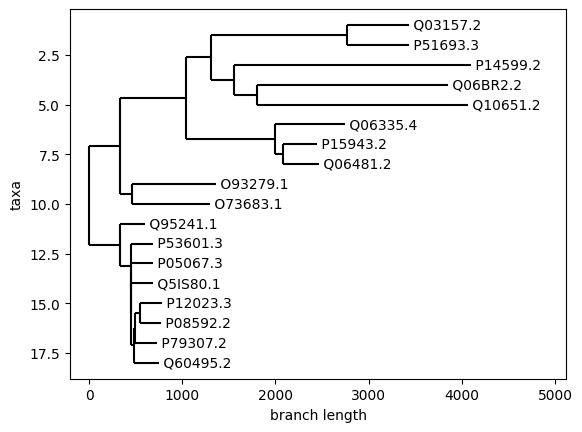

In [5]:
Phylo.draw(APP_tree)

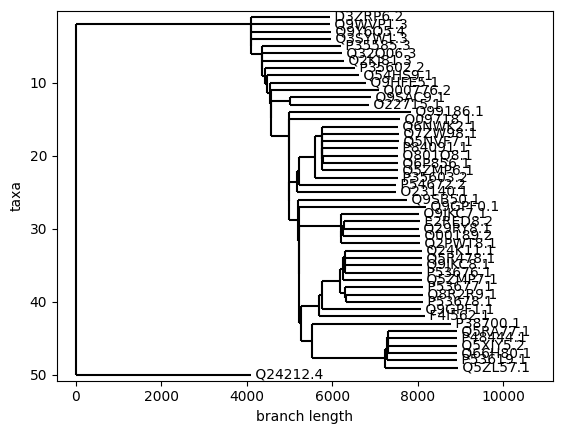

In [6]:
Phylo.draw(AP4_tree)

In [7]:
AP4_blast_dict = {}
with open('../raw/AP4-sp.txt') as f:
    pattern = re.compile(r'\[.+\]') #busco entre corchetes solo aparece el organismo
    for record in SeqIO.parse(f,'fasta'):
        organism = [match.group()[1:-1] for match in pattern.finditer(record.description)][0]
        seq = record.seq
        ID = record.id
        try:
            AP4_blast_dict[organism][ID] = seq
        except:
            AP4_blast_dict[organism] = {ID : seq}

print(AP4_blast_dict)

{'Homo sapiens': {'O00189.2': Seq('MISQFFILSSKGDPLIYKDFRGDSGGRDVAELFYRKLTGLPGDESPVVMHHHGR...IRI'), 'Q9Y6Q5.4': Seq('MSASAVFILDVKGKPLISRNYKGDVAMSKIEHFMPLLVQREEEGALAPLLSHGQ...RTS'), 'P53677.1': Seq('MIHSLFLINSSGDIFLEKHWKSVVSRSVCDYFFEAQERATEAENVPPVIPTPHH...VRT'), 'P48444.1': Seq('MVLLAAAVCTKAGKAIVSRQFVEMTRTRIEGLLAAFPKLMNTGKQHTFVETESV...EIL')}, 'Bos taurus': {'Q29RY8.1': Seq('MISQFFILSSKGDPLIYKDFRGDSGGRDVAELFYRKLTGLPGDESPVVMHHDDR...IRI'), 'Q2KJ81.3': Seq('MSASAVYVLDLKGKVLICRNYRGDVDMSEVEHFMPILMEKEEEGMLSPILAHGG...RTQ'), 'Q3SYW1.3': Seq('MSASAVFILDVKGKPLISRNYKGDVAMSEIDHFMPLLMQREEEGALTPLLSHGR...RTS'), 'Q24K11.1': Seq('MIHSLFLINCSGDIFLEKHWKSVVSQSVCDYFFEAQEKAADVENVPPVISTPHH...VRT'), 'P53619.1': Seq('MVLLAAAVCTKAGKAIVSRQFVEMTRTRIEGLLAAFPKLMNTGKQHTFVETESV...EIL')}, 'Rattus norvegicus': {'Q2PWT8.1': Seq('MISQFFILSSKGDPLIYKDFRGDSGGRDVAELFYRKLTGLPGGESPVVMYHDDR...IRI'), 'Q32Q06.3': Seq('MSASAVYVLDLKGKVLICRNYRGDVDMSEVEHFMPILMEKEEEGMLSPILAHGG...RTQ'), 'D3ZRP6.2': Seq('MSASAVFILDVKGKPLISRNYKGDVPMTEIDHFMP

In [8]:
APP_blast_dict = {}
with open('../raw/APP_sp.txt') as f:
    pattern = re.compile(r'\[.+\]') #busco entre corchetes solo aparece el organismo
    for record in SeqIO.parse(f,'fasta'):
        organism = [match.group()[1:-1] for match in pattern.finditer(record.description)][0]
        seq = record.seq
        ID = record.id
        try:
            APP_blast_dict[organism][ID] = seq
        except:
            APP_blast_dict[organism] = {ID : seq}

print(APP_blast_dict)

{'Homo sapiens': {'P05067.3': Seq('MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMNVQNGKWDS...MQN'), 'Q06481.2': Seq('MAATGTAAAAATGRLLLLLLVGLTAPALALAGYIEALAANAGTGFAVAEPQIAM...MQI'), 'P51693.3': Seq('MGPASPAARGLSRRPGQPPLPLLLPLLLLLLRAQPAIGSLAGGSPGAAEAPGSA...ERP')}, 'Pan troglodytes': {'Q5IS80.1': Seq('MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMNVQNGKWDS...MQN')}, 'Macaca fascicularis': {'P53601.3': Seq('MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMNVQNGKWDS...MQN')}, 'Sus scrofa': {'P79307.2': Seq('MLPGLALVLLAAWTARALEVPTDGNAGLLAEPQVAMFCGKLNMHMNVQNGKWES...MQN')}, 'Cavia porcellus': {'Q60495.2': Seq('MLPSLALLLLTTWTARALEVPTDGNAGLLAEPQIAMFCGKLNMHMNVQNGKWEP...MQN')}, 'Rattus norvegicus': {'P08592.2': Seq('MLPSLALLLLAAWTVRALEVPTDGNAGLLAEPQIAMFCGKLNMHMNVQNGKWES...MQN'), 'P15943.2': Seq('MAATGTAAAAATGKLLVLLLLGLTAPAAALAGYIEALAANAGTGFAVAEPQIAM...MQI')}, 'Mus musculus': {'P12023.3': Seq('MLPSLALLLLAAWTVRALEVPTDGNAGLLAEPQIAMFCGKLNMHMNVQNGKWES...MQN'), 'Q06335.4': Seq('MAATGTAAAAATGKLLVLLLLGLTAPAAALA

In [9]:
AP4_aln_dict = {}
with open('../processed/aln-AP4-sp.txt') as f:
    for record in SeqIO.parse(f,'fasta'):
        seq = record.seq
        ID = record.id
        AP4_aln_dict[ID] = seq

print(AP4_aln_dict)

{'Q5ZL57.1': Seq('------------------------------------------------------...---'), 'P53619.1': Seq('------------------------------------------------------...---'), 'Q66H80.1': Seq('------------------------------------------------------...---'), 'Q5XJY5.2': Seq('------------------------------------------------------...---'), 'Q5RA77.1': Seq('------------------------------------------------------...---'), 'P48444.1': Seq('------------------------------------------------------...---'), 'Q24212.4': Seq('MANPFLMDEDLDGCDAAANPFLMQSEPEPSSDNPFMAATVASNPFAFGADDLEL...DSN'), 'P38700.1': Seq('------------------------------------------------------...---'), 'F4I562.1': Seq('------------------------------------------------------...---'), 'Q9GPF1.1': Seq('------------------------------------------------------...---'), 'P53678.1': Seq('------------------------------------------------------...---'), 'Q8R2R9.1': Seq('------------------------------------------------------...---'), 'P53677.1': Seq('----------

In [10]:
APP_aln_dict = {}
with open('../processed/aln-APP-sp.txt') as f:
    for record in SeqIO.parse(f,'fasta'):
        seq = record.seq
        ID = record.id
        APP_aln_dict[ID] = seq

print(APP_aln_dict)

{'Q10651.2': Seq('---------------MT-------VGKLMIGLLIPIL-VATVYAEGSPAGSKRH...KA-'), 'P14599.2': Seq('-----------MCAALRR------NLLLRSLWVVLAI--------GTAQVQAAS...KE-'), 'Q06BR2.2': Seq('-----------MGPSVRPG-----FLVVVIGLQFVA-----------ASMEVNS...QNQ'), 'P51693.3': Seq('---MGPASPAARGLSRRPGQPPLPLLLPLLLLLLRAQPAIGSLA--GGSPGAAE...RP-'), 'Q03157.2': Seq('---MGPTSPAARGQGRRWRPPPLPLLLPLSLLLLRAQLAVGNLA--VGSPSAAE...RP-'), 'Q06481.2': Seq('MAATGTAAAAATGRLL---------LLLLVGLTAPALALAGYIEALAANAGTGF...MQI'), 'P15943.2': Seq('MAATGTAAAAATGKLL---------VLLLLGLTAPAAALAGYIEALAANAGTGF...MQI'), 'Q06335.4': Seq('MAATGTAAAAATGKLL---------VLLLLGLTAPAAALAGYIEALAANAGTGF...MQI'), 'Q60495.2': Seq('-----------MLPSLA--------LLLLTTWTARAL--------EVPTDGNAG...MQN'), 'Q95241.1': Seq('-----------MLPGLA--------LLLLAAWTARAL--------EVPTDGNAG...MQN'), 'P53601.3': Seq('-----------MLPGLA--------LLLLAAWTARAL--------EVPTDGNAG...MQN'), 'P05067.3': Seq('-----------MLPGLA--------LLLLAAWTARAL--------EVPTDGNAG...MQN'), 'Q5IS80.1': Seq('----------

In [20]:
AP4_ordered_aln_dict = {}
for aln_ID in AP4_aln_dict:
    seq = AP4_aln_dict[aln_ID]
    for organism in AP4_blast_dict:
        IDs = AP4_blast_dict[organism]
        for org_ID in IDs:
            if aln_ID == org_ID:
                try:
                    AP4_ordered_aln_dict[organism][org_ID] = seq
                except:
                    AP4_ordered_aln_dict[organism] = {org_ID:seq}
print(AP4_ordered_aln_dict)

{'Gallus gallus': {'Q5ZL57.1': Seq('------------------------------------------------------...---'), 'Q5ZMP7.1': Seq('------------------------------------------------------...---'), 'Q5ZMP6.1': Seq('------------------------------------------------------...---')}, 'Bos taurus': {'P53619.1': Seq('------------------------------------------------------...---'), 'Q24K11.1': Seq('------------------------------------------------------...---'), 'Q29RY8.1': Seq('------------------------------------------------------...---'), 'Q2KJ81.3': Seq('------------------------------------------------------...---'), 'Q3SYW1.3': Seq('------------------------------------------------------...---')}, 'Rattus norvegicus': {'Q66H80.1': Seq('------------------------------------------------------...---'), 'P53678.1': Seq('------------------------------------------------------...---'), 'P53676.1': Seq('------------------------------------------------------...---'), 'Q2PWT8.1': Seq('----------------------------------

In [21]:
APP_ordered_aln_dict = {}
for aln_ID in APP_aln_dict:
    seq = APP_aln_dict[aln_ID]
    for organism in APP_blast_dict:
        IDs = APP_blast_dict[organism]
        for org_ID in IDs:
            if aln_ID == org_ID:
                try:
                    APP_ordered_aln_dict[organism][org_ID] = seq
                except:
                    APP_ordered_aln_dict[organism] = {org_ID:seq}
print(APP_ordered_aln_dict)

{'Caenorhabditis elegans': {'Q10651.2': Seq('---------------MT-------VGKLMIGLLIPIL-VATVYAEGSPAGSKRH...KA-')}, 'Drosophila melanogaster': {'P14599.2': Seq('-----------MCAALRR------NLLLRSLWVVLAI--------GTAQVQAAS...KE-')}, 'Doryteuthis pealeii': {'Q06BR2.2': Seq('-----------MGPSVRPG-----FLVVVIGLQFVA-----------ASMEVNS...QNQ')}, 'Homo sapiens': {'P51693.3': Seq('---MGPASPAARGLSRRPGQPPLPLLLPLLLLLLRAQPAIGSLA--GGSPGAAE...RP-'), 'Q06481.2': Seq('MAATGTAAAAATGRLL---------LLLLVGLTAPALALAGYIEALAANAGTGF...MQI'), 'P05067.3': Seq('-----------MLPGLA--------LLLLAAWTARAL--------EVPTDGNAG...MQN')}, 'Mus musculus': {'Q03157.2': Seq('---MGPTSPAARGQGRRWRPPPLPLLLPLSLLLLRAQLAVGNLA--VGSPSAAE...RP-'), 'Q06335.4': Seq('MAATGTAAAAATGKLL---------VLLLLGLTAPAAALAGYIEALAANAGTGF...MQI'), 'P12023.3': Seq('-----------MLPSLA--------LLLLAAWTVRAL--------EVPTDGNAG...MQN')}, 'Rattus norvegicus': {'P15943.2': Seq('MAATGTAAAAATGKLL---------VLLLLGLTAPAAALAGYIEALAANAGTGF...MQI'), 'P08592.2': Seq('-----------MLPSLA--------LLLLAAW

In [22]:
import pprint

In [23]:
pprint.pprint(APP_ordered_aln_dict)

{'Caenorhabditis elegans': {'Q10651.2': Seq('---------------MT-------VGKLMIGLLIPIL-VATVYAEGSPAGSKRH...KA-')},
 'Cavia porcellus': {'Q60495.2': Seq('-----------MLPSLA--------LLLLTTWTARAL--------EVPTDGNAG...MQN')},
 'Doryteuthis pealeii': {'Q06BR2.2': Seq('-----------MGPSVRPG-----FLVVVIGLQFVA-----------ASMEVNS...QNQ')},
 'Drosophila melanogaster': {'P14599.2': Seq('-----------MCAALRR------NLLLRSLWVVLAI--------GTAQVQAAS...KE-')},
 'Homo sapiens': {'P05067.3': Seq('-----------MLPGLA--------LLLLAAWTARAL--------EVPTDGNAG...MQN'),
                  'P51693.3': Seq('---MGPASPAARGLSRRPGQPPLPLLLPLLLLLLRAQPAIGSLA--GGSPGAAE...RP-'),
                  'Q06481.2': Seq('MAATGTAAAAATGRLL---------LLLLVGLTAPALALAGYIEALAANAGTGF...MQI')},
 'Macaca fascicularis': {'P53601.3': Seq('-----------MLPGLA--------LLLLAAWTARAL--------EVPTDGNAG...MQN')},
 'Mus musculus': {'P12023.3': Seq('-----------MLPSLA--------LLLLAAWTVRAL--------EVPTDGNAG...MQN'),
                  'Q03157.2': Seq('---MGPTSPAARGQGRRWRPPPLPLLLPLS

In [24]:
better_APP_dict = {}
for org, sequences in APP_ordered_aln_dict.items():
    for ID, sequence in sequences.items():
        better_APP_dict[f"{ID} {org}"] = sequence
        

In [25]:
pprint.pprint(better_APP_dict)

{'O73683.1 Tetraodon fluviatilis': Seq('-----------MGHSVA-------WLLLVAAASTLAA--------EVPTDVSMG...MQN'),
 'O93279.1 Takifugu rubripes': Seq('-----------MGETTA-------FVLLLVATLTRSS--------EIPADDTVG...MQN'),
 'P05067.3 Homo sapiens': Seq('-----------MLPGLA--------LLLLAAWTARAL--------EVPTDGNAG...MQN'),
 'P08592.2 Rattus norvegicus': Seq('-----------MLPSLA--------LLLLAAWTVRAL--------EVPTDGNAG...MQN'),
 'P12023.3 Mus musculus': Seq('-----------MLPSLA--------LLLLAAWTVRAL--------EVPTDGNAG...MQN'),
 'P14599.2 Drosophila melanogaster': Seq('-----------MCAALRR------NLLLRSLWVVLAI--------GTAQVQAAS...KE-'),
 'P15943.2 Rattus norvegicus': Seq('MAATGTAAAAATGKLL---------VLLLLGLTAPAAALAGYIEALAANAGTGF...MQI'),
 'P51693.3 Homo sapiens': Seq('---MGPASPAARGLSRRPGQPPLPLLLPLLLLLLRAQPAIGSLA--GGSPGAAE...RP-'),
 'P53601.3 Macaca fascicularis': Seq('-----------MLPGLA--------LLLLAAWTARAL--------EVPTDGNAG...MQN'),
 'P79307.2 Sus scrofa': Seq('-----------MLPGLA--------LVLLAAWTARAL--------EVPTDGNAG...MQN'),
 'Q03157.2

In [31]:
with open('../processed/aln-APP-sp-species.fasta', 'w') as f:
    for header, sequence in better_APP_dict.items():
        formatted_header = header.replace(" ", "_")
        f.write(f'>{formatted_header}\n{sequence}\n')

In [27]:
better_AP4_dict = {}
for org, sequences in AP4_ordered_aln_dict.items():
    for ID, sequence in sequences.items():
        better_AP4_dict[f"{ID} {org}"] = sequence
        

In [28]:
pprint.pprint(better_AP4_dict)

{'D3ZRP6.2 Rattus norvegicus': Seq('------------------------------------------------------...---'),
 'E2RED8.2 Canis lupus familiaris': Seq('------------------------------------------------------...---'),
 'F4I562.1 Arabidopsis thaliana': Seq('------------------------------------------------------...---'),
 'O00189.2 Homo sapiens': Seq('------------------------------------------------------...---'),
 'O22715.1 Arabidopsis thaliana': Seq('------------------------------------------------------...---'),
 'O23140.1 Arabidopsis thaliana': Seq('------------------------------------------------------...---'),
 'P35585.3 Mus musculus': Seq('------------------------------------------------------...---'),
 'P35602.2 Caenorhabditis elegans': Seq('------------------------------------------------------...---'),
 'P35603.2 Caenorhabditis elegans': Seq('------------------------------------------------------...---'),
 'P38700.1 Saccharomyces cerevisiae S288C': Seq('-------------------------------------

In [30]:
with open('../processed/aln-AP4-sp-species.fasta', 'w') as f:
    for header, sequence in better_AP4_dict.items():
        formatted_header = header.replace(" ", "_")
        f.write(f'>{formatted_header}\n{sequence}\n')